

<style>
    /* Markdown hücrelerinin arka plan rengi */
    .markdown-cell {
        background-color: lightgray;PART- 2 ( Handling With Missing Vales )
    }

    /* Markdown hücrelerinin metin boyutu */
    .markdown-cell p {
        font-size: 16px;
    }
</style>

<style>
    /* Markdown hücrelerinin arka plan rengi */
    .markdown-cell {
        background-color: lightgray;
    }

    /* Markdown hücrelerinin metin boyutu */
    .markdown-cell p {
        font-size: 16px;
    }
</style>

# Part-2 ( Handling With Missing Vales )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df=pd.read_csv('df1_cleaned.csv')

In [3]:
df.shape

(28630, 53)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(1).T

,0
make_model,Mercedes-Benz A 160
short_description,CDi
make,Mercedes-Benz
model,A 160
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN..."
price,16950
body_type,Compact
type,Used
doors,5.00
country_version,Spain


In [6]:
df.shape

(28630, 52)

In [7]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'taxi_or_rental_car', 'country', 'city'],
      dtype='object')

In [8]:
df1=df.copy()

In [9]:
null_counts = df1.isnull().sum()
total_rows = len(df1)

null_info = pd.DataFrame({
    'Null_count': null_counts,
    'Percentage': (null_counts / total_rows) * 100
}).sort_values(by='Null_count', ascending=False)

print(null_info)

                         Null_count  Percentage
taxi_or_rental_car            28208       98.53
power_consumption             28115       98.20
last_service                  26627       93.00
other_fuel_types              26317       91.92
production_date               22722       79.36
co_efficiency                 20826       72.74
energy_efficiency_class       20826       72.74
model_code                    20263       70.78
emissions_sticker             19216       67.12
non_smoker_vehicle            17036       59.50
general_inspection            16376       57.20
full_service_history          16065       56.11
previous_owner                14615       51.05
upholstery_colour             14061       49.11
warranty                      12846       44.87
country_version               11741       41.01
drivetrain                    11737       41.00
empty_weight                  10872       37.97
emission_class                10771       37.62
co_emissions                  10036     

In [11]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.8, color="r")
    plt.show()

<Figure size 1000x500 with 0 Axes>

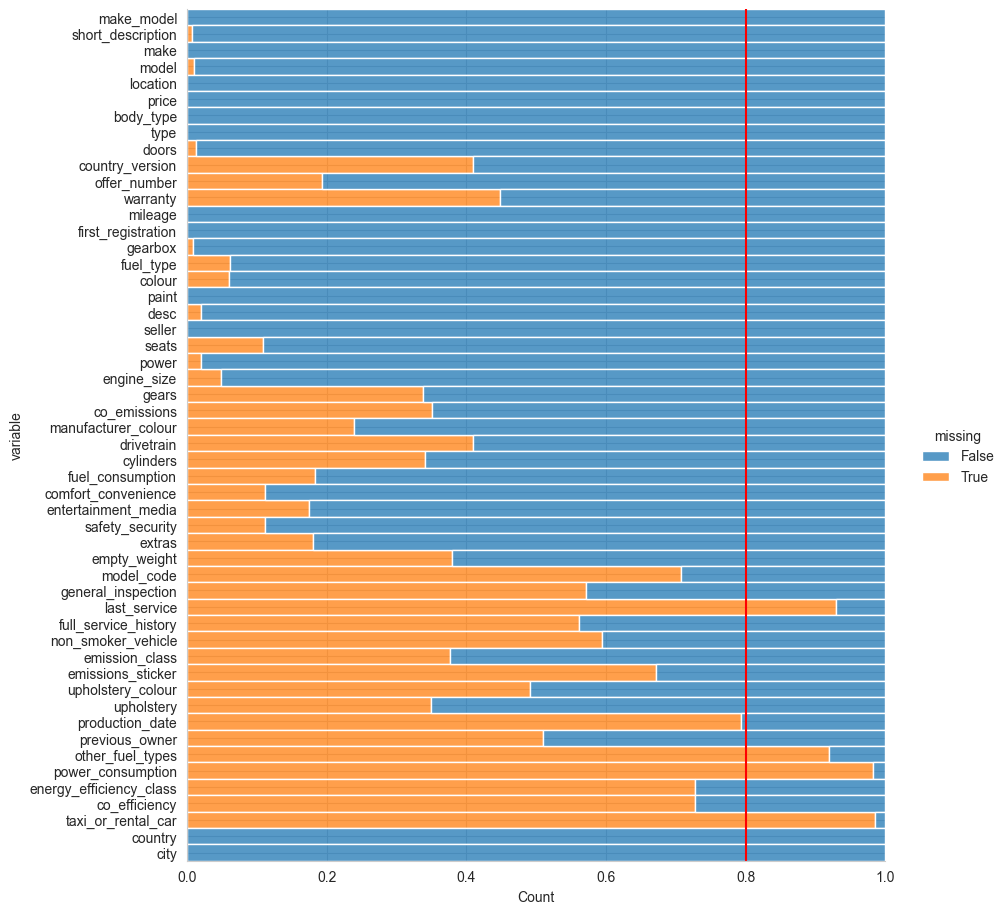

In [12]:
show_nulls(df1);

# Doors

In [13]:
df1.groupby(["make_model", "body_type"])["doors"].apply(lambda x: x.mode())

make_model    body_type          
Dacia         Compact           0   5.00
              Sedan             0   5.00
              Station wagon     0   5.00
Dacia Break   Station wagon     0   4.00
Dacia Dokker  Compact           0   4.00
                                    ... 
Volvo XC90    Coupe             0   4.00
              Off-Road/Pick-up  0   5.00
              Sedan             0   5.00
              Station wagon     0   4.00
                                1   5.00
Name: doors, Length: 1279, dtype: float64

In [14]:
df1.groupby(["make_model", "body_type"])["doors"].apply(lambda x: x.isna().sum())

make_model    body_type       
Dacia         Compact             0
              Sedan               0
              Station wagon       0
Dacia Break   Station wagon       0
Dacia Dokker  Compact             0
                                 ..
Volvo XC70    Station wagon       0
Volvo XC90    Coupe               0
              Off-Road/Pick-up    0
              Sedan               1
              Station wagon       0
Name: doors, Length: 1257, dtype: int64

In [15]:
df1["doors"].mode()

0   5.00
Name: doors, dtype: float64

In [17]:
df1["doors"]=df1["doors"].astype('str')

In [18]:
df1["doors_mode"] = df1.groupby(["make_model", "body_type"])["doors"].transform(lambda x : x.mode()[0])
df1["doors_mode"].value_counts()

doors_mode
5.0    19647
2.0     5862
3.0     1665
4.0     1396
nan       60
Name: count, dtype: int64

In [19]:
df1.loc[df1["doors"] == "nan", "doors"] = df1.loc[df1["doors"] == "nan", "doors_mode"]
df1["doors"].value_counts()

doors
5.0    17597
2.0     5662
4.0     3010
3.0     2304
nan       50
6.0        5
1.0        2
Name: count, dtype: int64

In [20]:
df1["doors"].replace({"nan": 5.0}, inplace=True)

In [21]:
df1["doors"].value_counts()

doors
5.0    17597
2.0     5662
4.0     3010
3.0     2304
5.0       50
6.0        5
1.0        2
Name: count, dtype: int64

In [22]:
df1["doors"]=df1["doors"].astype('float')

In [23]:
df1["doors"].dtype

dtype('float64')

In [24]:
df1["doors"]=df1["doors"].astype('int')

In [25]:
df1["doors"].dtype

dtype('int32')

In [26]:
df1["doors"].isna().sum()

0

In [27]:
df1.drop('country_version', axis=1, inplace=True)

In [28]:
df1.drop('offer_number', axis=1, inplace=True)

In [29]:
df1.drop('doors_mode', axis=1, inplace=True)

In [30]:
df1.drop('location', axis=1, inplace=True)

In [31]:
df1.drop('desc', axis=1, inplace=True)

# Warranty

In [32]:
df1["warranty"].value_counts(dropna=False)

warranty
NaN           12846
12 months      9545
Yes            2319
24 months      1515
60 months       968
              ...  
55 months         1
99 months         1
122 months        1
44 months         1
4 months          1
Name: count, Length: 66, dtype: int64

In [33]:
df1["warranty"] = df1["warranty"].str.replace(" months", "")

In [34]:
df1["warranty"]= df1["warranty"].replace("Yes", 12) # standart garanti süresi 12 ay diye düsünüyorum.

In [35]:
df1["warranty"].value_counts(dropna=False)

warranty
NaN    12846
12      9545
12      2319
24      1515
60       968
       ...  
55         1
99         1
122        1
44         1
4          1
Name: count, Length: 66, dtype: int64

In [36]:
df1["warranty"] = df1["warranty"].astype(float)

In [37]:
df1["warranty"] = df1["warranty"].apply(lambda x : 0 if pd.isnull(x) else 1 if x <= 12 else 2 if x>12 and x<=36 else 3 )

In [38]:
df1["warranty"].value_counts(dropna=False)

warranty
0    12846
1    12628
2     1976
3     1180
Name: count, dtype: int64

In [789]:
df1.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
model,A 160,EQE 350,A 45 AMG,A 35 AMG,A 45 AMG
price,16950,80900,69900,46990,16800
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5,4,5,5,5
warranty,2,2,1,1,1
mileage,120200.00,5000.00,18900.00,18995.00,197000.00


# Mileage


In [39]:
df1['mileage'].value_counts(dropna=False)

mileage
10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
141589.00      1
59821.00       1
123500.00      1
29781.00       1
230047.00      1
Name: count, Length: 14184, dtype: int64

In [40]:
df1['mileage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
28629 non-null  float64
dtypes: float64(1)
memory usage: 223.8 KB


In [41]:
df1['mileage'].isna().sum()

1

In [42]:
df1.loc[df1['mileage'].isna()].T

,10753
make_model,Fiat 500X
short_description,1.5 Hybrid Cabrio Automaat Yacht Club Capri
make,Fiat
model,500X
price,41570
body_type,Off-Road/Pick-up
type,Demonstration
doors,5
warranty,1
mileage,NaN


In [43]:
df1["first_registration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: first_registration
Non-Null Count  Dtype 
--------------  ----- 
28628 non-null  object
dtypes: object(1)
memory usage: 223.8+ KB


In [44]:
df1["first_registration"] = pd.to_datetime(df1["first_registration"])

In [45]:
df1.loc[df1["first_registration"]=='2022-06-01']

,make_model,short_description,make,model,price,body_type,type,doors,warranty,mileage,...,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co_efficiency,taxi_or_rental_car,country,city
1,Mercedes-Benz EQE 350,350+,Mercedes-Benz,EQE 350,80900,Compact,Pre-registered,4,2,5000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES,LOGROÑO
170,Mercedes-Benz CL,200 163ch AMG Line 7G-DCT 9cv,Mercedes-Benz,CL,39900,Compact,Used,5,0,7000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,Saint Maximin
237,Mercedes-Benz CL,200 163ch AMG Line 7G-DCT 9cv,Mercedes-Benz,CL,39990,Compact,Used,5,0,8500.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,Vert St Denis
253,Mercedes-Benz CL,200 163ch AMG Line 7G-DCT 9cv,Mercedes-Benz,CL,39990,Compact,Used,5,0,8500.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,Vert St Denis
263,Mercedes-Benz CL,200 163ch AMG Line 7G-DCT 9cv,Mercedes-Benz,CL,39990,Compact,Used,5,0,8500.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR,Vert St Denis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27429,Volvo XC40,T3 Momentum Core,Volvo,XC40,33900,Off-Road/Pick-up,Pre-registered,5,2,12.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES,GRANOLLERS
27621,Volvo V90 Cross Country,"B5 D AWD Ultimate Bright 173 kW,",Volvo,V90 Cross Country,71850,Station wagon,Demonstration,5,1,4000.00,...,Part leather,NaN,NaN,NaN,NaN,A,Calculated on basis of measured CO₂-emissions ...,NaN,DE,Dresden
28008,Volvo V90 Cross Country,"B5 D AWD Ultimate Bright 173 kW,",Volvo,V90 Cross Country,71850,Station wagon,Demonstration,5,1,4000.00,...,Part leather,NaN,NaN,NaN,NaN,A,Calculated on basis of measured CO₂-emissions ...,NaN,DE,Dresden
28418,Volvo XC40,1.5 T4 Twin Auto Recharge R-Design,Volvo,XC40,44800,Sedan,Pre-registered,5,2,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES,HERNANI


In [46]:
df1.loc[df1["first_registration"]=='2022-06-01']['mileage'].mean()

2108.152224824356

In [47]:
df1.loc[df1.mileage.isna(), 'mileage']=df1.loc[df1["first_registration"]=='2022-06-01']['mileage'].mean()

In [48]:
df1.iloc[10753]['mileage']

2108.152224824356

In [49]:
df1['mileage'].isna().sum()

0

# First Registration

In [50]:
df1['first_registration'].isna().sum()

2

In [51]:
df1.loc[df1['first_registration'].isna()].T

,683,16884
make_model,Mercedes-Benz E 53 AMG,Toyota Corolla
short_description,Classe E AMG 53 4MATIC+,2.0 Hybrid Buss. Plus NAV LM DAB Android/Apple
make,Mercedes-Benz,Toyota
model,E 53 AMG,Corolla
price,108900,33999
body_type,Convertible,Compact
type,Demonstration,Demonstration
doors,2,5
warranty,2,0
mileage,3856.00,2494.00


In [52]:
df1['year'] = df1['first_registration'].dt.year
df1['year']

0       2016.00
1       2022.00
2       2020.00
3       2020.00
4       2015.00
          ...  
28625   2019.00
28626   2004.00
28627   2011.00
28628   2017.00
28629   2002.00
Name: year, Length: 28630, dtype: float64

In [53]:
df1.loc[df1.first_registration.isna(), 'year'] = 2022

In [54]:
df1['year'].isna().sum()

0

In [55]:
df1["age"] = 2022 - df1["year"] 

In [56]:
df1["age"].value_counts(dropna=False)

age
3.00       3667
4.00       3492
0.00       3088
1.00       2870
2.00       2473
           ... 
93.00         1
66.00         1
-180.00       1
94.00         1
72.00         1
Name: count, Length: 83, dtype: int64

In [57]:
df1["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: age
Non-Null Count  Dtype  
--------------  -----  
28630 non-null  float64
dtypes: float64(1)
memory usage: 223.8 KB


In [58]:
df1[df1['year'] > 2022]['first_registration']

7011    2202-10-01
9764    2025-05-01
19213   2023-04-01
Name: first_registration, dtype: datetime64[ns]

?

# Gearbox

In [59]:
df1["gearbox"].value_counts(dropna=False)

gearbox
Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: count, dtype: int64

In [61]:
df1.loc[df1['gearbox'].isna()]['gears'].value_counts()

gears
5.00    21
7.00     8
6.00     6
4.00     4
1.00     4
8.00     4
0.00     3
2.00     1
3.00     1
Name: count, dtype: int64

In [62]:
df1.loc[df1['gearbox'].isna()]['make_model']

150          Mercedes-Benz A 180
175       Mercedes-Benz A 35 AMG
210          Mercedes-Benz A 200
222          Mercedes-Benz A 220
235          Mercedes-Benz A 220
                  ...           
27848                  Volvo V90
28020                  Volvo V60
28029                  Volvo V90
28032    Volvo V90 Cross Country
28228                  Volvo V90
Name: make_model, Length: 248, dtype: object

In [63]:
df1.gearbox = df1.gearbox.fillna(df1.groupby("make_model")["gearbox"].transform(lambda x: x.mode()[0]))
df1.gearbox.value_counts(dropna=False)

gearbox
Manual            17190
Automatic         11368
Semi-automatic       72
Name: count, dtype: int64

In [64]:
df1['gearbox']=df1['gearbox'].astype('string')

# Fuel Type

In [65]:
df["fuel_type"].value_counts(dropna=False)

fuel_type
benzine     17334
diesel       8727
NaN          1787
LPG           378
others        216
electric      188
Name: count, dtype: int64

In [67]:
df1.loc[df1['fuel_type']=='benzine']['other_fuel_types'].value_counts(dropna=False)

other_fuel_types
NaN             16824
Electricity       508
Hydogen             1
Super E10 95        1
Name: count, dtype: int64

In [68]:
df1.loc[df1['fuel_type'].isna()]['make_model'].value_counts(dropna=False)

make_model
Toyota Corolla    111
Toyota Auris      107
Toyota Yaris       89
Fiat 500           84
Hyundai IONIQ      75
                 ... 
Toyota Prius+       1
Nissan Sunny        1
Nissan Ariya        1
Nissan Evalia       1
Fiat                1
Name: count, Length: 121, dtype: int64

In [69]:
df1.loc[df1['fuel_type'].isna()]['other_fuel_types'].value_counts(dropna=False)

other_fuel_types
Electricity    1767
NaN              10
Hydogen          10
Name: count, dtype: int64

In [70]:
df1.groupby(['make_model', 'other_fuel_types'])['fuel_type'].value_counts()

make_model      other_fuel_types  fuel_type
Fiat 500        Electricity       benzine       8
Fiat 500C       Electricity       benzine      12
Fiat New Panda  Electricity       benzine       1
Fiat Panda      Electricity       benzine       4
Fiat Tipo       Electricity       benzine       1
                                               ..
Volvo V60       Electricity       diesel        6
Volvo V90       Electricity       benzine      58
Volvo XC40      Electricity       benzine      18
Volvo XC60      Electricity       benzine      54
Volvo XC90      Electricity       benzine      18
Name: count, Length: 67, dtype: int64

In [72]:
import numpy as np

def fill_fuel_type(row):
    if pd.isna(row['fuel_type']):
        if row['other_fuel_types'] == 'Electricity':     #saha arastirmasi ile fuel_type 'benzine' olanlarin other_type larinin 'electric oldugunu gördük, ona göre doldurduk.'
            return 'benzine'
        elif row['other_fuel_types'] == 'Hydogen':
            return 'electric'
    return row['fuel_type']

df1['fuel_type'] = df1.apply(fill_fuel_type, axis=1)

In [73]:
df1["fuel_type"].value_counts(dropna=False)

fuel_type
benzine     19101
diesel       8727
LPG           378
others        216
electric      198
NaN            10
Name: count, dtype: int64

In [74]:
df1.loc[df1['fuel_type'].isna()][['make_model', 'short_description']].value_counts(dropna=False)

make_model         short_description                                 
Ford Mustang       3.7 V6 Aut. Cabrio/Design Leder/Xenon/                1
                   GT 4.6 Cabrio Unfallfrei, Deutsche EZ                 1
Hyundai TUCSON     1.6 GDi 2WD Trend Bluetooth Klima                     1
                   1.6 Turbo 2WD Advantage mit AHK aus erster            1
Hyundai i30        CW 1.4i i-Motion Business AIRCO TREKHAAL LPG-G3 De    1
Mercedes-Benz 500  SL                                                    1
Nissan Sunny       *AUS 2 HAND*AUTOMATIK*SERVO*                          1
Renault Arkana     ARKANA E-Tech 145 - 21B R.S. Line                     1
                   tce 140 edc fap r.s. line                             1
Skoda Octavia      COMBI/CNG/1.5 G-TEC AMBITION DSG                      1
Name: count, dtype: int64

In [75]:
df1.loc[df1['fuel_type'].isna()][['make_model', 'short_description']]

,make_model,short_description
740,Mercedes-Benz 500,SL
5664,Renault Arkana,tce 140 edc fap r.s. line
5839,Renault Arkana,ARKANA E-Tech 145 - 21B R.S. Line
14529,Skoda Octavia,COMBI/CNG/1.5 G-TEC AMBITION DSG
19573,Nissan Sunny,*AUS 2 HAND*AUTOMATIK*SERVO*
21321,Ford Mustang,"GT 4.6 Cabrio Unfallfrei, Deutsche EZ"
21676,Ford Mustang,3.7 V6 Aut. Cabrio/Design Leder/Xenon/
23825,Hyundai TUCSON,1.6 GDi 2WD Trend Bluetooth Klima
23843,Hyundai TUCSON,1.6 Turbo 2WD Advantage mit AHK aus erster
24526,Hyundai i30,CW 1.4i i-Motion Business AIRCO TREKHAAL LPG-G...


In [76]:
df1.loc[[740, 5664, 5839, 19573, 21321, 21676, 23825, 23843], 'fuel_type'] = 'benzine'


In [77]:
df1["fuel_type"].value_counts(dropna=False)

fuel_type
benzine     19109
diesel       8727
LPG           378
others        216
electric      198
NaN             2
Name: count, dtype: int64

In [78]:
df1.loc[[24526,14529], 'fuel_type']='LPG'

In [79]:
df1["fuel_type"].value_counts(dropna=False)

fuel_type
benzine     19109
diesel       8727
LPG           380
others        216
electric      198
Name: count, dtype: int64

In [80]:
df1["fuel_type"].dtype

dtype('O')

# Colour

In [81]:
df1['colour'].value_counts(dropna=False)

colour
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: count, dtype: int64

In [82]:
df1['manufacturer_colour'].value_counts(dropna=False)

manufacturer_colour
NaN                               6843
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: count, Length: 4964, dtype: int64

In [831]:
df1.loc[df1['colour'].isna()]["manufacturer_colour"].value_counts(dropna=False)

manufacturer_colour
NaN                              243
BLANCO                            58
Gris                              56
BLANC                             49
NOIR                              46
                                ... 
ROSÉ GOLD                          1
CELESTIAL BLUE                     1
LACKIERUNG PLATINIUM-GRAU/TYP      1
ESM BLEU VERTIGO METALLIS          1
DENIM BLUE                         1
Name: count, Length: 514, dtype: int64

In [83]:
df1["manufacturer_colour"]=df1["manufacturer_colour"].str.lower()

In [84]:
color_dict = {
    "Black": ["bianco gelato tetto nero", "black solid (stone) / solid", "black solid", "black stone", "black", "dark night", "exy - lack onyx schwarz", "karbonschw graphitschw midnigh", "lackierung schwarz perla nera/", "midnight black metalizado", "negro absolute", "negro agate", "negro azabache", "negro cinema (sólido)", "negro mtl", "negro obsidiana (metalizado)", "negro obsidiana", "negro onyx m. c717e", "negro rubí", "negro", "nero pastello", "nero", "noir (z11g)", "noir attitude", "noir cinema", "noir cosmos métallisé", "noir etoilé", "noir métal", "noir metallique", "noir nacré", "noir obscur", "noir onyx (o)", "noir onyx métallisé", "noir onyx", "noir perla nera (m)", "noir perla nera metallise", "noir perla nera", "noir perla", "noir", "noire perla nera", "noire perla", "noire", "obsidianschwarz", "onyx black / metallic", "onyx black", "onyx schwarz", "phantom black / met", "phantom black / mic", "phantom black métal", "preto", "scharz", "schwarz", "universo schwarz", "zwart", "zwarte"],
    "Blue": ["aquamarin-blau", "arden blau (p2/so)", "azul báltico", "azul cavansita", "azul chrome", "azul denim metalizada", "azul denim metalizado", "azul denim", "azul espectral", "azul marino", "azul medianoche", "azul oscuro", "azul tormenta", "azul", "azzurro", "barents blue pearl", "blau metallic", "blau", "blauw metallic", "blauw", "bleu avatar", "bleu azurite", "bleu c", "bleu célèbes (m)", "bleu celebes", "bleu clair métal", "bleu cosmos", "bleu de france", "bleu de prusse bi-ton", "bleu denim métallisé", "bleu f", "bleu fonce", "bleu foncé", "bleu foudre", "bleu iron", "bleu magnetic", "bleu metal", "bleu navy", "bleu nuit", "bleu vertigo", "bleu", "blu italia metallizzato", "blu", "blue marin", "bursting blue / metallic", "celestial blue", "chroma-blau metallic", "colore esterno (blu suggestivo", "dark blue", "dark knight", "dark sapphire", "denim blue / metallic", "denim blue", "diamant blau(m2) / diam silb", "dolphinblau metallic", "esm bleu vertigo metallis", "faded denim (m)", "inc", "indigoblau (p2)", "intense blue", "juniperblue / mystikschwaz met", "lackierung magnetic-blau/metal", "magnetic blue metalizado", "magnetic blue", "morning blue / sol", "peinture bleu iron", "race-blau metallic", "race-blau", "splash cyan metallic", "stellar blue / met", "surfy blue", "teal blue / met", "tiefsee blau", "titanblau metallic"],
    "Yellow": ["amarillo", "geel", "amg solarbeam", "ingnite flame", "jaune", "jaune faro", "luminous sand m.c719e"],
    "Gray": ["aluminium-grau", "amazon gray", "amazon grey / met", "anthracite", "anthrazit", "antracite", "argent iridium métallisé", "argent iridium", "argent polaire", "blanc cristal", "dark knight / mic", "dark knight", "dark metal grey", "dark night (perlado)", "electric shadow / sol", "grafitgrau", "granate", "graphitgrau", "grau", "graumet.", "gray", "grigio platinum", "grigio", "grijs metallic", "grijs", "gris / plata", "gris acier", "gris anthracite", "gris argent", "gris argenté", "gris argile", "gris artense (m)", "gris artense", "gris atlas", "gris baltique", "gris c", "gris carbonizado", "gris cassiopée", "gris celestine", "gris ceramic", "gris ceramique", "gris clair metal", "gris clair métal", "gris clair", "gris claire", "gris clara", "gris colosseo (metalizado)", "gris comete metal", "gris comete", "gris comète", "gris f", "gris foncé métal", "gris fonce", "gris foncé", "gris gallium (m)", "gris gallium", "gris givré", "gris grafito metalizado", "gris grafito", "gris graphite", "gris haria", "gris highland", "gris hurricane", "gris lunaire métallisée", "gris lunaire", "gris maestro (metalizado)", "gris maestro", "gris magnetic", "gris magnético", "gris manhatan bi-ton toit noir", "gris metal", "gris mineral", "gris moda (metalizado)", "gris moda", "gris montagne magno manufaktur", "gris montagne métallisé", "gris montagne", "gris montaña met", "gris mtl", "gris oscuro", "gris osmium", "gris perle", "gris plata", "gris platine", "gris platinium", "gris pompei metalizado", "gris selenita magno", "gris selenita", "gris shades of grey", "gris squale (kadg)", "gris squale", "gris technic", "gris tenorita", "gris titanium", "gris urban", "gris-negro", "gris", "grisb fonce", "grise", "gun (m)", "gun metallic (m)", "gunmetal grey metalizado", "k23g-gris argent#gris graphite", "katana grey + midnight black m", "kometen grau met. kna", "kosmosschwarz", "kua - lackierung grau haria", "lack grau artense/typ aussenve", "lack grau hurricane/typ aussen", "lackierung aluminium-grau/meta", "lackierung platinium-grau/meta", "lackierung platinium-grau/typ", "licht grau", "magnetic grau", "matt grey", "micron grey / met", "midnight / metallic", "milano grigio", "moon rock", "night shade (m)", "night shade metallic", "night shade", "osmium grey / metallic", "pebble grey", "pine grey / metallic", "pine grey", "pintura metalizada - plat", "plat.anthr.", "plata aragonita metalizado", "plata hightech", "plata iridio metalizado", "platin anthrazhit metallic", "platinum silver metalizado", "quarz-grau metallic", "rosantracite met.", "schwarz metallic", "selenitgrau", "shadow grey", "silky grey", "skyline grey metalizado", "stahlgrau", "thunder grey m. c728e", "titan-grau", "zbdk-gris platine-met", "zu lackieren silver grey 1e7/m"],
    "Red": ["bordeaux", "burgundy", "corrida-rot", "cuprite", "desire rot", "dragon red", "engine red", "fiery red", "hot magenta", "lava rot", "metro m2", "new rosso", "opera bordeaux metallic", "opera bordeaux", "org.rubinrot", "passion red metalizado", "peinture spéciale rouge jupite", "power red", "race-rot", "red met", "red", "reinrot", "rojo lucid", "rojo metalizado", "rojo passione", "rojo race", "rojo tokio", "rojo", "rot", "rot/metallic klarlack", "rot/weiß", "rouge candy", "rouge désir métal", "rouge désir", "rouge elixir", "rouge et noir", "rouge foncé", "rouge fusion", "rouge intense", "rouge kardio", "rouge métal", "rouge passion", "rouge passione pastel", "rouge passione", "rouge scarlet", "rouge ultimate", "rouge velvet", "rouge", "rubellitrot", "ruby rot", "sunset red", "very berry red met (171v)", "vibrant red (s)", "zu lackieren rot 3p0/deckende"],
    "White": ["abalone white tri-4 (486b)", "arctic white", "atlas white", "biały", "bianco alabastro", "bianco gelato pastello", "bianco perla", "bianco", "blan lunaire", "blanc arktis", "blanc banquise", "blanc digital métallisé", "blanc gelato", "blanc glacier", "blanc lipizan", "blanc lunair", "blanc lunaire (qabg)", "blanc lunaire", "blanc métal", "blanc nacré (s)", "blanc nacre", "blanc nacré", "blanc nevada", "blanc opaque", "blanc perle", "blanc polaire", "blanc", "blanche", "blanco (sólido)", "blanco gelato (sólido)", "blanco gelato sólido", "blanco gelato", "blanco negro", "blanco oxford (sólida)", "blanco perlado", "blanco platinum (metalizada)", "blanco polar", "blanco", "business grau", "candy weis", "candy weiss", "candy-weiss", "casablanca/arctic/eis weiss", "diamantweiss - metalliclack", "frost-weiß", "frozen white", "glacier", "gletscherweiss", "ice white", "jade weiss/arktis weiss", "kwe blanc nacre", "lack weiss perlglänzend/metall", "lack weiss perlglänzend/typ au", "laser-weiss", "magnetic-tech", "manufaktur blanco diamant", "nevada wei", "niebieski", "perlmutt-weiss", "polar white / sol", "polar white", "polar white/phantom black", "polarweiß", "polarweiü", "pure white / sol", "sapporo white s?lido", "schneeweiß", "snow / metallic", "solid white s?lido", "weiss metallic", "weiß", "white", "wit", "x-blanco"],
    "Silver": ["aluminium silb/kristall silb", "argent silber", "argent", "argentato", "bright silver / metallic", "coloris métal tech house grey", "grigio underground (vr-695/a)", "gris aluminium", "gun-metallic", "magnetic metallic", "magnetic tech", "magnetic", "metalstream metallic", "plata iridio", "plata metalizado", "plata", "plateado", "platin-grau", "platinsilber metallic", "platinsilber", "platinum silver", "silber", "sleek silver", "sleek silver/toit noir", "switchblade silver met (g)", "titansilber mica metallic", "whtie metallic", "zilver metallic", "zilver"],
    "Green": ["bambusgruen", "dark camouflage metallic", "fresh mint", "green", "groen", "grün", "kiwi-grün", "smaragd gruen (mi)", "smaragd gruen", "verde oscuro", "verde", "vert clair", "vert f", "vert fonce", "vert olivine", "vert"],
    "Brown": ["adventure braun", "braun", "bruin", "brun ebène", "brun vison", "cafe (metallic)", "chocolat", "granate", "guaranja braun metallic", "lack terre d ombre/metallic-la", "mahogany brown (p2/so)", "maple brown / metallic", "marron metal", "marron", "marrón", "tan brown mica"],
    "Orange": ["mandarin orange (mica)", "naranja cuántico (metalizado)", "naranja", "orange arizon", "orange arizona", "orange atacama", "orange fusion", "orange power", "orange sicilia pastel extra-sé", "orange", "oranje"],
    "Purple": ["bohemelila metallic", "dunkel amethyst metallic / da", "mauve", "nordlichtviolett - metalliclac", "morado", "paars"],
    "Pink": ["rosa", "roze", "colore esterno (rosso passione", "rosa", "rose gold", "rosso seduzione tetto nero", "rosso", "roz"],
    "Beige": ["beige", "beige / negro", "beige cappuccino pastel", "beige ceniza (metalizado)", "beige dune", "beige métal", "creme metallic", "ivoire", "ivoire tri-couche", "ivory", "mativoire", "pannacotta", "pannacotta m2", "shiny rock met"],
    "Gold": ["goud", "oro", "rose gold (metalizado)", "rosé gold", "warmgold metallic / schw. dach"],
    "Bronze": ["bronze", "colore esterno (bronzo bronzin", "metallic copper", "platinumbronze", "silky bronze", "bronce"],
    "Other": ["1k0", "automatico", "be style parigi", "bi-tono ambar", "camara", "inconnu", "kodiaq 2.0 tdi 110kw 150cv dsg", "llanta 20", "other", "otro", "otros", "solid / solid", "tourmaline", "vari colori", "varios"],
}

In [85]:
for value in df1.loc[df1['colour'].isna(), "manufacturer_colour"]:
  
    if value in [color for colors in color_dict.values() for color in colors]:
        for key, colors in color_dict.items():
            if value in colors:
                df1.loc[df1['manufacturer_colour'] == value, 'colour'] = key
                break

In [86]:
df1['colour'].value_counts(dropna=False)

colour
Black     6727
White     5545
Grey      4932
Blue      3673
Red       2272
Silver    1690
Gray      1410
Brown      496
Green      465
Beige      305
Orange     303
NaN        254
Yellow     234
Violet      83
Pink        80
Bronze      73
Gold        61
Other       24
Purple       3
Name: count, dtype: int64

In [88]:
df1['colour'].isna().sum()

254

In [89]:
df1['colour'] = df1.groupby(['manufacturer_colour', 'paint'])['colour'].fillna(method='bfill').fillna(method='ffill')

In [90]:
df1['colour'].isna().sum()

1

In [91]:
df1['colour'] = df1.groupby(['paint'])['colour'].fillna(method='bfill').fillna(method='ffill')

In [92]:
df1['colour'].isna().sum()

0

In [93]:
df1['colour']=df1['colour'].astype('string')

In [94]:
df1['colour']=df1['colour'].apply(lambda x: 'Black' if x=='Black' else 'White' if x== 'White'
                                  else 'Grey' if x in ['Grey', 'Gray']  else 'Others')

In [95]:
df1['colour'].value_counts(dropna=False)

colour
Others    9348
Black     6940
Grey      6650
White     5692
Name: count, dtype: int64

# Seller

In [98]:
df1['seller'].value_counts(dropna=False)

seller
Dealer            26318
Private seller     2312
Name: count, dtype: int64

In [99]:
df1['seller'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: seller
Non-Null Count  Dtype 
--------------  ----- 
28630 non-null  object
dtypes: object(1)
memory usage: 223.8+ KB


In [100]:
df1['seller']=df1['seller'].astype('string')

# Seats

In [101]:
df1['seats'].value_counts(dropna=False)

seats
5.00     18308
4.00      5390
NaN       3125
2.00      1186
7.00       488
8.00        43
9.00        35
3.00        25
6.00        12
0.00         9
1.00         7
17.00        2
Name: count, dtype: int64

In [102]:
df1.loc[df1["seats"].isna()][["make_model", "body_type"]].value_counts(dropna=False)

make_model         body_type       
Nissan Qashqai     Sedan               158
Dacia Sandero      Sedan               135
Ford Mustang       Coupe               111
Fiat 500L          Station wagon        60
Fiat 500X          Off-Road/Pick-up     58
                                      ... 
Opel GT            Coupe                 1
Opel Crossland X   Sedan                 1
Mercedes-Benz 260  Sedan                 1
Opel Corsa-e       Compact               1
Dacia Break        Station wagon         1
Name: count, Length: 560, dtype: int64

In [103]:
df1.groupby(["make_model", "body_type"])["seats"].agg(pd.Series.mode)

make_model    body_type       
Dacia         Compact                   5.00
              Sedan                     5.00
              Station wagon             7.00
Dacia Break   Station wagon               []
Dacia Dokker  Compact                     []
                                     ...    
Volvo XC70    Station wagon             5.00
Volvo XC90    Coupe                     7.00
              Off-Road/Pick-up          7.00
              Sedan                       []
              Station wagon       [5.0, 7.0]
Name: seats, Length: 1257, dtype: object

In [850]:
df1["seats"] = df1.groupby(['make_model', 'body_type'], group_keys = False)['seats'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [851]:
df1['seats'].value_counts(dropna=False)

seats
5.00     20561
4.00      5957
2.00      1261
7.00       535
NaN        182
8.00        44
9.00        35
3.00        25
6.00        12
0.00         9
1.00         7
17.00        2
Name: count, dtype: int64

In [852]:
df1['seats']=df1.groupby(['make_model'], group_keys = False)['seats'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [853]:
df1['seats'].value_counts(dropna=False)

seats
5.00     20682
4.00      5968
2.00      1265
7.00       541
8.00        44
NaN         39
9.00        35
3.00        26
6.00        12
0.00         9
1.00         7
17.00        2
Name: count, dtype: int64

In [854]:
df1['seats']=df1.groupby(['body_type'], group_keys = False)['seats'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [855]:
df1['seats'].value_counts(dropna=False)

seats
5.00     20706
4.00      5983
2.00      1265
7.00       541
8.00        44
9.00        35
3.00        26
6.00        12
0.00         9
1.00         7
17.00        2
Name: count, dtype: int64

In [856]:
df1['seats']=df1['seats'].astype('int')

# Engine Size

In [857]:
df1['engine_size'].value_counts(dropna=False)

engine_size
1598.00    2099
999.00     2068
1969.00    1929
NaN        1403
1461.00    1110
           ... 
2753.00       1
2495.00       1
200.00        1
3224.00       1
2473.00       1
Name: count, Length: 468, dtype: int64

In [858]:
df1.groupby(['make_model', 'body_type', 'fuel_type'])['engine_size'].value_counts()

make_model    body_type         fuel_type  engine_size
Dacia         Compact           benzine    0.00           1
              Sedan             benzine    1289.00        1
              Station wagon     benzine    999.00         1
Dacia Dokker  Compact           diesel     1461.00        1
              Off-Road/Pick-up  LPG        1598.00        1
                                                         ..
Volvo XC90    Off-Road/Pick-up  diesel     2401.00        4
                                           2.00           2
                                electric   1969.00        2
              Sedan             diesel     1969.00        2
              Station wagon     diesel     1969.00        4
Name: count, Length: 3810, dtype: int64

In [859]:
df1["engine_size"] = df1.groupby(["make_model", "body_type", "fuel_type"])["engine_size"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [860]:
df1['engine_size'].value_counts(dropna=False)

engine_size
1598.00    2175
999.00     2144
1969.00    1947
1461.00    1148
1998.00    1029
           ... 
2441.00       1
2991.00       1
2980.00       1
2464.00       1
2473.00       1
Name: count, Length: 495, dtype: int64

In [861]:
df1['engine_size'].isna().sum()

365

In [862]:
df1["engine_size"] = df1.groupby(["make_model", "body_type"])["engine_size"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [863]:
df1['engine_size'].isna().sum()

212

In [864]:
df1["engine_size"] = df1.groupby(["make_model"])["engine_size"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [865]:
df1['engine_size'].isna().sum()

80

In [866]:
df1["engine_size"].describe().T

count   28550.00
mean     1746.83
std      1048.17
min         0.00
25%      1329.00
50%      1598.00
75%      1984.00
max     99900.00
Name: engine_size, dtype: float64

In [867]:
df1["engine_size"].fillna(df["engine_size"].median(), inplace=True)

In [868]:
df1['engine_size'].isna().sum()

0

In [869]:
df1["engine_size"].dtype

dtype('float64')

In [870]:
df1["engine_size"]=df1["engine_size"].astype('int')

# Power

In [871]:
df1['power'].value_counts(dropna=False)

power
110.00    1992
96.00     1356
88.00     1182
81.00     1166
66.00     1110
          ... 
746.00       1
570.00       1
471.00       1
179.00       1
26.00        1
Name: count, Length: 352, dtype: int64

In [872]:
df1['power'].isna().sum()

572

In [873]:
df1["power"] = df1.groupby(["make_model", "body_type","engine_size"])["power"].transform(lambda x : x.median())
df1["power"].value_counts(dropna=False)

power
110.00    1899
88.00     1407
96.00     1388
81.00     1311
66.00     1120
          ... 
34.00        1
570.00       1
294.00       1
238.00       1
15.00        1
Name: count, Length: 376, dtype: int64

In [874]:
df1['power'].isna().sum()

48

In [875]:
df1['power'].describe().T

count   28582.00
mean      117.71
std        64.39
min         1.00
25%        81.00
50%       100.00
75%       135.00
max       588.00
Name: power, dtype: float64

In [876]:
df1["power"] = df1.groupby(["make_model","engine_size"])["power"].transform(lambda x : x.median())

In [877]:
df1['power'].isna().sum()

34

In [878]:
df1["power"] = df1.groupby(["engine_size"])["power"].transform(lambda x : x.median())

In [879]:
df1['power'].isna().sum()

11

In [880]:
df1["power"].fillna(df1["power"].median(), inplace=True)

In [881]:
df1['power'].isna().sum()

0

In [882]:
df1['power'].dtype

dtype('float64')

In [883]:
df1['power']=df1['power'].astype('int')

# Gears

In [884]:
df["gears"].value_counts(dropna=False)  # drop at the end 

gears
NaN      9676
6.00     8412
5.00     5335
7.00     1738
8.00     1690
1.00      712
9.00      642
4.00      256
10.00     112
0.00       31
3.00       24
2.00        2
Name: count, dtype: int64

In [885]:
df.groupby(["make_model","gearbox"])["gears"].agg([pd.Series.mode, "median"]).T

make_model    Dacia         Dacia Break Dacia Dokker Dacia Duster         \
gearbox    Automatic Manual      Manual       Manual    Automatic Manual   
mode            1.00   4.00          []         5.00         6.00   6.00   
median          1.00   4.00         NaN         5.00         6.00   6.00   

make_model Dacia Jogger Dacia Lodgy Dacia Logan         ...  \
gearbox          Manual      Manual   Automatic Manual  ...   
mode               6.00        6.00        5.00   5.00  ...   
median             6.00        6.00        5.00   5.00  ...   

make_model Volvo V90 Cross Country Volvo XC40        Volvo XC60         \
gearbox                  Automatic  Automatic Manual  Automatic Manual   
mode                          8.00       8.00   6.00       8.00   6.00   
median                        8.00       8.00   6.00       8.00   6.00   

make_model Volvo XC70        Volvo XC90                        
gearbox     Automatic Manual  Automatic Manual Semi-automatic  
mode             6.00   6.00       8.00   6.00           8.00  
median           6.00   6.00       8.00   6.00           8.00  

[2 rows x 897 columns]

# Co Emissions

In [886]:
df1["co_emissions"].value_counts(dropna=False)

co_emissions
NaN       10036
0.00       1040
119.00      393
124.00      340
129.00      319
          ...  
332.00        1
70.00         1
338.00        1
342.00        1
53.00         1
Name: count, Length: 327, dtype: int64

In [887]:
df1["co_emissions"].isnull().sum()

10036

In [888]:
df1.loc[df["co_emissions"] == 0 , "fuel_type"].value_counts(dropna=False)

fuel_type
benzine     688
electric    194
diesel      150
LPG           5
others        3
Name: count, dtype: int64

In [889]:
df1.loc[df["co_emissions"] == 0 , "other_fuel_types"].value_counts(dropna=False)

other_fuel_types
NaN             926
Electricity     104
Hydogen           9
Super E10 95      1
Name: count, dtype: int64

In [890]:
df1.loc[df["co_emissions"] == 0 , "co_efficiency"].value_counts(dropna=False)

co_efficiency
NaN                                                                                           918
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.    122
Name: count, dtype: int64

In [891]:
df1.groupby(["make_model","fuel_type"])["co_emissions"].value_counts(dropna=False)

make_model    fuel_type  co_emissions
Dacia         benzine    NaN             4
                         130.00          1
Dacia Break   benzine    NaN             1
Dacia Dokker  LPG        NaN             3
                         143.00          2
                                        ..
Volvo XC90    diesel     159.00          2
                         0.00            2
                         136.00          2
                         219.00          2
              electric   0.00            4
Name: count, Length: 6341, dtype: int64

In [892]:
df1.groupby(["make_model","emission_class", "fuel_type"])["co_emissions"].value_counts(dropna=False)

make_model    emission_class  fuel_type  co_emissions
Dacia         Euro 6          benzine    NaN             2
                                         130.00          1
Dacia Dokker  Euro 5          LPG        NaN             1
                                         165.00          1
              Euro 6          LPG        143.00          2
                                                        ..
Volvo XC90    Euro 6          diesel     150.00          4
                                         136.00          2
                                         159.00          2
                                         154.00          2
                                         208.00          2
Name: count, Length: 6191, dtype: int64

In [893]:
df1['co_emissions'] = df1.groupby(['make_model', 'emission_class', 'fuel_type'])['co_emissions'].fillna(method='bfill').fillna(method='ffill')


In [894]:
df1["co_emissions"].value_counts(dropna=False)

co_emissions
0.00      1314
119.00     616
124.00     556
129.00     539
99.00      432
          ... 
394.00       1
398.00       1
73.00        1
70.00        1
335.00       1
Name: count, Length: 321, dtype: int64

In [895]:
df1["co_emissions"].isna().sum()

5

In [896]:
df1['co_emissions'] = df1.groupby(['make_model', 'fuel_type'])['co_emissions'].fillna(method='bfill').fillna(method='ffill')

In [897]:
df1["co_emissions"].isna().sum()

0

In [898]:
df1["co_emissions"]=df1["co_emissions"].astype('int')

# Drivetrain

In [899]:
df1['drivetrain'].value_counts(dropna=False)

drivetrain
Front    12066
NaN      11737
4WD       3252
Rear      1575
Name: count, dtype: int64

In [900]:
df1.groupby(['make_model', 'body_type', 'gearbox','fuel_type','power'])['drivetrain'].value_counts(dropna=False)

make_model   body_type         gearbox         fuel_type  power  drivetrain
Dacia        Compact           Automatic       benzine    100    NaN           2
                                                                 Front         1
             Sedan             Manual          benzine    40     NaN           1
             Station wagon     Manual          benzine    70     NaN           1
Dacia Break  Station wagon     Manual          benzine    88     NaN           1
                                                                              ..
Volvo XC90   Off-Road/Pick-up  Manual          diesel     140    4WD           2
             Sedan             Automatic       benzine    145    NaN           1
                                               diesel     145    NaN           2
             Station wagon     Automatic       diesel     145    4WD           2
                               Semi-automatic  diesel     145    4WD           2
Name: count, Length: 6314, dtype:

In [901]:
df1['drivetrain']=df1.groupby(['make_model', 'body_type', 'gearbox','fuel_type','power'])['drivetrain'].fillna(method='bfill').fillna(method='ffill')

In [902]:
df1['drivetrain'].value_counts(dropna=False)

drivetrain
Front    21371
4WD       4353
Rear      2906
Name: count, dtype: int64

In [903]:
df1['drivetrain']=df1['drivetrain'].astype('string')

# Cylinders

In [904]:
df1['cylinders'].value_counts(dropna=False)

cylinders
4.00     13068
NaN       9778
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: count, dtype: int64

In [905]:
df1['cylinders']=df1.groupby(["make_model","body_type"] ,group_keys = False)["cylinders"].transform(lambda x: x.fillna(x.median()))

df1['cylinders']=df1.groupby(["make_model"] ,group_keys = False)["cylinders"].transform(lambda x: x.fillna(x.median()))

df1['cylinders'].fillna(df1['cylinders'].median(),inplace=True)

In [906]:
df1['cylinders'].isna().sum()

0

In [907]:
df1['cylinders'].value_counts(dropna=False)

cylinders
4.00     19643
3.00      5155
6.00      1312
5.00       994
8.00       943
1.00       135
2.00       105
0.00       100
3.50        93
0.50        87
7.00        35
4.50        14
12.00       11
2.50         1
26.00        1
16.00        1
Name: count, dtype: int64

In [908]:
df1['cylinders'].dtype

dtype('float64')

<Figure size 1000x500 with 0 Axes>

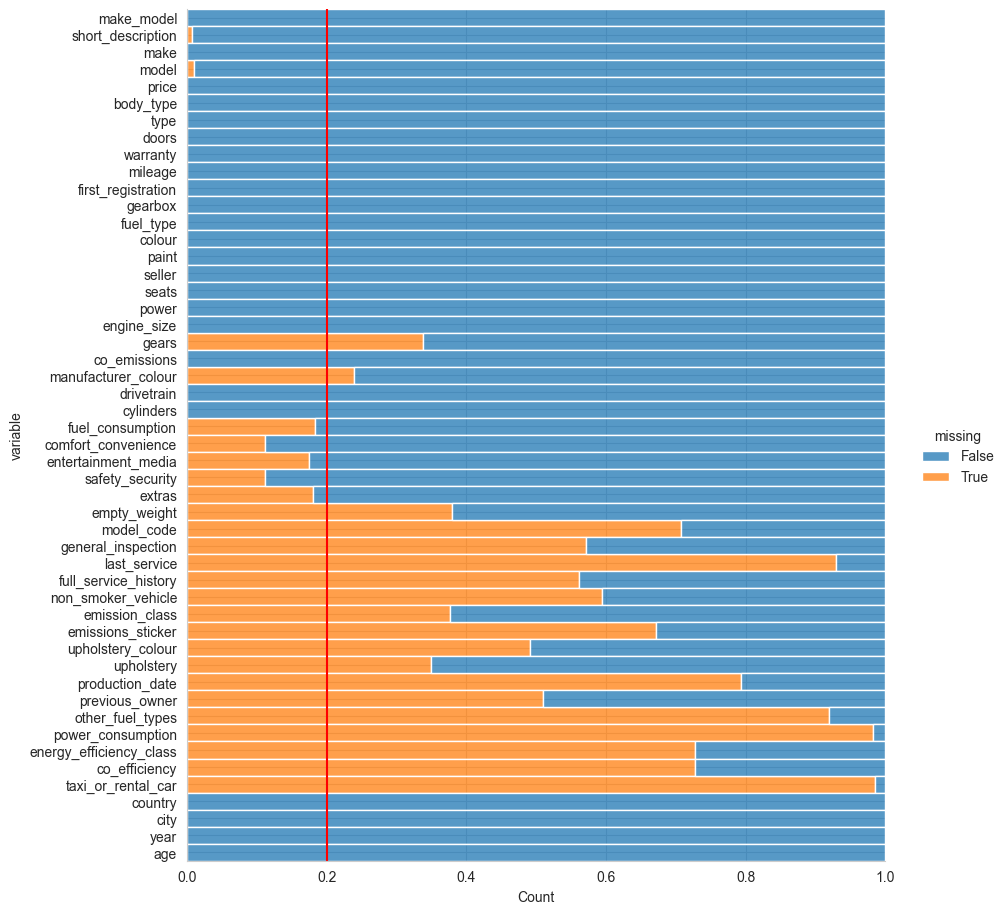

In [909]:
show_nulls(df1);

# Fuel Consumption

In [910]:
df1['fuel_consumption'].value_counts(dropna=False)

fuel_consumption
NaN                       5245
5 l/100 km (comb.)         818
4.9 l/100 km (comb.)       809
4.5 l/100 km (comb.)       690
5.1 l/100 km (comb.)       639
                          ... 
6.5 kg/100 km (comb.)        1
4 kg/100 km (comb.)          1
7 l/100 km (city)            1
4.9 l/100 km (country)       1
9 l/100 km (country)         1
Name: count, Length: 219, dtype: int64

In [911]:
df1['fuel_consumption'] = df1['fuel_consumption'].str.extract(r"(\d+\.?\d*)")
df1['fuel_consumption'].value_counts(dropna=False)

fuel_consumption
NaN     5245
5        831
4.9      812
4.5      690
0        652
        ... 
16         1
57         1
61         1
14.5       1
44         1
Name: count, Length: 162, dtype: int64

In [912]:
df1['fuel_consumption']=df1.groupby(['make_model', 'body_type', 'engine_size','fuel_type','power'])['fuel_consumption'].fillna(method='bfill').fillna(method='ffill')

In [913]:
df1['fuel_consumption'].isna().sum()

0

In [914]:
df1['fuel_consumption']=df1['fuel_consumption'].astype('float')

# Comfort Conveinence

In [915]:
df1['comfort_convenience'].value_counts(dropna=False)

comfort_convenience
NaN                                                                                                                                                                                                                                                                                                                                                                                                            3197
air conditioning, automatic climate control, electrical side mirrors, multi-function steering wheel, power windows                                                                                                                                                                                                                                                                                              244
air conditioning, automatic climate control, cruise control                                                                                                                 

In [916]:
df1["comfort_convenience_count"] = df1['comfort_convenience'].str.count(',') + 1


In [917]:
df1["comfort_convenience_count"].value_counts(dropna=False)

comfort_convenience_count
NaN      3197
5.00     1429
6.00     1360
3.00     1224
7.00     1189
4.00     1108
17.00    1100
15.00    1081
8.00     1070
16.00    1062
18.00    1057
19.00    1055
14.00    1052
20.00    1050
10.00    1023
11.00     987
12.00     980
13.00     921
21.00     880
9.00      873
22.00     832
2.00      765
23.00     731
24.00     650
1.00      585
25.00     428
26.00     347
27.00     200
28.00     150
29.00     118
30.00      62
31.00      34
32.00      15
33.00      12
34.00       3
Name: count, dtype: int64

In [918]:
df1['comfort_convenience_count']=df1.groupby(['make_model', 'body_type','price'])['comfort_convenience_count'].fillna(method='bfill').fillna(method='ffill')

In [919]:
df1["comfort_convenience_count"].isna().sum()

3

In [920]:
df1['comfort_convenience_count']=df1.groupby(['make_model','price'])['comfort_convenience_count'].fillna(method='bfill').fillna(method='ffill')

In [921]:
df1["comfort_convenience_count"].isna().sum()

3

In [922]:
df1["comfort_convenience_count"]=df1.groupby(["make_model"])["comfort_convenience_count"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [923]:
df1["comfort_convenience_count"].isna().sum()

0

In [924]:
df1["comfort_convenience_count"].dtype

dtype('float64')

In [925]:
df1["comfort_convenience_count"]=df1["comfort_convenience_count"].astype('int')

In [926]:
df1["comfort_convenience_count"].value_counts(dropna=False)

comfort_convenience_count
5     1650
6     1554
3     1461
7     1380
4     1269
8     1220
17    1206
15    1191
10    1189
16    1169
14    1150
20    1143
19    1139
18    1136
12    1101
11    1100
13    1052
9      995
2      973
21     946
22     883
23     781
1      780
24     696
25     460
26     376
27     208
28     160
29     125
30      67
31      36
32      17
33      14
34       3
Name: count, dtype: int64

In [927]:
df1["comfort_convenience"]=df1["comfort_convenience_count"].apply(lambda x: "Low" if (x >= 1 and x <= 10) else 
                                       ("Medium" if (x > 10 and x <= 20) else "High" if (x > 20) else None))


In [928]:
df1["comfort_convenience"].value_counts(dropna=False)

comfort_convenience
Low       12471
Medium    11387
High       4772
Name: count, dtype: int64

In [929]:
df1["comfort_convenience"]=df1["comfort_convenience"].astype('str')

In [930]:
df1["comfort_convenience"].dtype

dtype('O')

In [931]:
df1["comfort_convenience_n"]=df1["comfort_convenience_count"].apply(lambda x: 1 if (x >= 1 and x <= 10) else 
                                       (2 if (x > 10 and x <= 20) else 3 if (x > 20) else None))

In [932]:
df1["comfort_convenience_n"].value_counts(dropna=False)

comfort_convenience_n
1    12471
2    11387
3     4772
Name: count, dtype: int64

In [933]:
df1["comfort_convenience_n"].dtype

dtype('int64')

# Safety Security

In [934]:
df1['safety_security'].value_counts(dropna=False)

safety_security
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3215
isofix                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [935]:
df1["safety_security_count"] = df1['safety_security'].str.count(',') + 1

In [936]:
df1["safety_security_count"].value_counts(dropna=False)

safety_security_count
NaN      3215
9.00     1706
8.00     1370
10.00    1310
13.00    1274
11.00    1274
14.00    1237
12.00    1227
15.00    1176
7.00     1142
16.00    1111
18.00     976
17.00     927
19.00     907
22.00     904
21.00     868
6.00      848
23.00     840
24.00     826
20.00     802
25.00     733
26.00     686
1.00      662
4.00      469
5.00      424
3.00      408
27.00     372
2.00      262
28.00     247
29.00     154
30.00     153
31.00      60
32.00      27
34.00      18
33.00      12
35.00       2
36.00       1
Name: count, dtype: int64

In [937]:
df1['safety_security_count']=df1.groupby(['make_model', 'body_type','price'])['safety_security_count'].fillna(method='bfill').fillna(method='ffill')

In [938]:
df1['safety_security_count'].isna().sum()

3

In [939]:
df1["safety_security_count"]=df1.groupby(["make_model"])["safety_security_count"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [940]:
df1['safety_security_count'].isna().sum()

0

In [941]:
df1['safety_security_count']=df1['safety_security_count'].astype('int')

In [942]:
df1['safety_security_count'].value_counts(dropna=False)

safety_security_count
9     1947
8     1536
11    1475
13    1455
10    1455
14    1406
12    1371
7     1355
15    1305
16    1227
18    1055
6     1019
17    1018
19     989
22     976
21     943
23     899
24     896
20     872
1      835
25     781
26     738
4      586
3      553
5      503
27     406
2      305
28     267
29     164
30     162
31      66
32      27
34      21
33      13
36       2
35       2
Name: count, dtype: int64

In [943]:
df1["safety_security"]=df1["safety_security_count"].apply(lambda x: "Low" if (x >= 1 and x <= 10) else 
                                       ("Medium" if (x > 10 and x <= 20) else "High" if (x > 20) else None))

In [944]:
df1['safety_security'].value_counts(dropna=False)

safety_security
Medium    12173
Low       10094
High       6363
Name: count, dtype: int64

In [945]:
df1['safety_security']=df1['safety_security'].astype('str')

In [946]:
df1["safety_security_n"]=df1["safety_security_count"].apply(lambda x: 1 if (x >= 1 and x <= 10) else 
                                       (2 if (x > 10 and x <= 20) else 3 if (x > 20) else None))

In [947]:
df1['safety_security_n'].value_counts(dropna=False)

safety_security_n
2    12173
1    10094
3     6363
Name: count, dtype: int64

# Entertainment Media

In [948]:
df1['entertainment_media'].value_counts(dropna=False)

entertainment_media
NaN                                                                                                                                                                        4986
bluetooth, usb                                                                                                                                                              753
bluetooth                                                                                                                                                                   665
on-board computer                                                                                                                                                           662
cd player, on-board computer, radio                                                                                                                                         644
                                                                                                    

In [949]:
df1["entertainment_media_count"] = df1['entertainment_media'].str.count(',') + 1

In [950]:
df1["entertainment_media_count"].value_counts(dropna=False)

entertainment_media_count
NaN      4986
2.00     2555
3.00     2444
4.00     2241
1.00     2157
7.00     2105
8.00     2058
6.00     2040
5.00     2019
9.00     1800
10.00    1602
11.00    1196
12.00     840
13.00     448
14.00     115
15.00      20
16.00       4
Name: count, dtype: int64

In [951]:
df1['entertainment_media_count']=df1.groupby(['make_model', 'body_type','price'])['entertainment_media_count'].fillna(method='bfill').fillna(method='ffill')

In [952]:
df1['entertainment_media_count'].isna().sum()

3

In [953]:
df1["entertainment_media_count"]=df1.groupby(["make_model"])["entertainment_media_count"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [954]:
df1['entertainment_media_count'].isna().sum()

0

In [955]:
df1['entertainment_media_count']=df1['entertainment_media_count'].astype('int')

In [956]:
df1['entertainment_media_count'].value_counts(dropna=False)

entertainment_media_count
1     3211
2     3203
3     3123
4     2726
5     2398
7     2394
8     2392
6     2391
9     2065
10    1771
11    1339
12     940
13     512
14     131
15      22
16      12
Name: count, dtype: int64

In [957]:
df1["entertainment_media"]=df1["entertainment_media_count"].apply(lambda x: "Low" if (x >= 1 and x <= 5) else 
                                       ("Medium" if (x > 5 and x <= 10) else "High" if (x > 10) else None))

In [958]:
df1["entertainment_media"].value_counts(dropna=False)

entertainment_media
Low       14661
Medium    11013
High       2956
Name: count, dtype: int64

In [959]:
df1["entertainment_media"]=df1["entertainment_media"].astype('str')

In [960]:
df1["entertainment_media_n"]=df1["entertainment_media_count"].apply(lambda x: 1 if (x >= 1 and x <= 5) else 
                                       (2 if (x > 5 and x <= 10) else 3 if (x > 10) else None))

In [961]:
df1["entertainment_media_n"].value_counts(dropna=False)

entertainment_media_n
1    14661
2    11013
3     2956
Name: count, dtype: int64

# Extras

In [962]:
df1["extras"].value_counts(dropna=False)

extras
NaN                                                                                                                                                                                                                                                                 5150
alloy wheels                                                                                                                                                                                                                                                        3408
alloy wheels, roof rack                                                                                                                                                                                                                                              380
alloy wheels, sport seats                                                                                                                                                                             

In [963]:
df1["extras_count"] = df1['extras'].str.count(',') + 1

In [964]:
df1["extras_count"].value_counts(dropna=False)

extras_count
NaN      5150
1.00     4874
2.00     3105
3.00     2797
4.00     2315
5.00     2024
6.00     1597
7.00     1494
8.00     1137
9.00      997
10.00     880
11.00     650
12.00     565
13.00     378
14.00     271
15.00     191
16.00     108
17.00      55
18.00      27
19.00      10
20.00       3
26.00       2
Name: count, dtype: int64

In [965]:
df1['extras_count']=df1.groupby(['make_model', 'body_type','price'])['extras_count'].fillna(method='bfill').fillna(method='ffill')

In [966]:
df1["extras_count"].value_counts(dropna=False)

extras_count
1.00     6466
2.00     3969
3.00     3412
4.00     2775
5.00     2423
6.00     1887
7.00     1745
8.00     1309
9.00     1133
10.00     962
11.00     746
12.00     642
13.00     419
14.00     313
15.00     204
16.00     112
17.00      64
18.00      30
19.00      11
NaN         3
20.00       3
26.00       2
Name: count, dtype: int64

In [967]:
df1["extras_count"]=df1.groupby(["make_model"])["extras_count"].transform(lambda x: x.fillna(x.median()) if len(x.mode()) > 0 else x)

In [968]:
df1["extras_count"].isna().sum()

0

In [969]:
df1["extras_count"]=df1["extras_count"].astype('int')

In [970]:
df1["extras"]=df1["extras_count"].apply(lambda x: "Low" if (x >= 1 and x <= 5) else 
                                       ("Medium" if (x > 5 and x <= 10) else "High" if (x > 10) else None))

In [971]:
df1["extras"].value_counts(dropna=False)

extras
Low       19047
Medium     7037
High       2546
Name: count, dtype: int64

In [972]:
df1["extras"]=df1["extras"].astype('str')

In [973]:
df1["extras_n"]=df1["extras_count"].apply(lambda x: 1 if (x >= 1 and x <= 5) else 
                                       (2 if (x > 5 and x <= 10) else 3 if (x > 10) else None))

In [974]:
df1["extras_n"].value_counts(dropna=False)

extras_n
1    19047
2     7037
3     2546
Name: count, dtype: int64

# Empty Weight

In [975]:
df1['empty_weight'].value_counts(dropna=False) # price i etkileyecegini düsünmedigim icin drop edebiliriz.

empty_weight
NaN        10872
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: count, Length: 1219, dtype: int64

# General Inspection

In [976]:
df1['general_inspection'].value_counts(dropna=False)

general_inspection
NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
           ...  
09/2017        1
08/2013        1
08/2020        1
08/2018        1
03/2021        1
Name: count, Length: 92, dtype: int64

In [977]:
df1['general_inspection'] = df1['general_inspection'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )
df1['general_inspection'].value_counts(dropna=False)

general_inspection
No     16376
Yes    12254
Name: count, dtype: int64

In [978]:
df1['general_inspection']=df1['general_inspection'].astype('str')

In [979]:
df1['general_inspection'] = df1['general_inspection'].apply(lambda x : 0 if x=='No' else 1 if x=='Yes' else 2 )

In [980]:
df1['general_inspection'].value_counts(dropna=False)

general_inspection
0    16376
1    12254
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

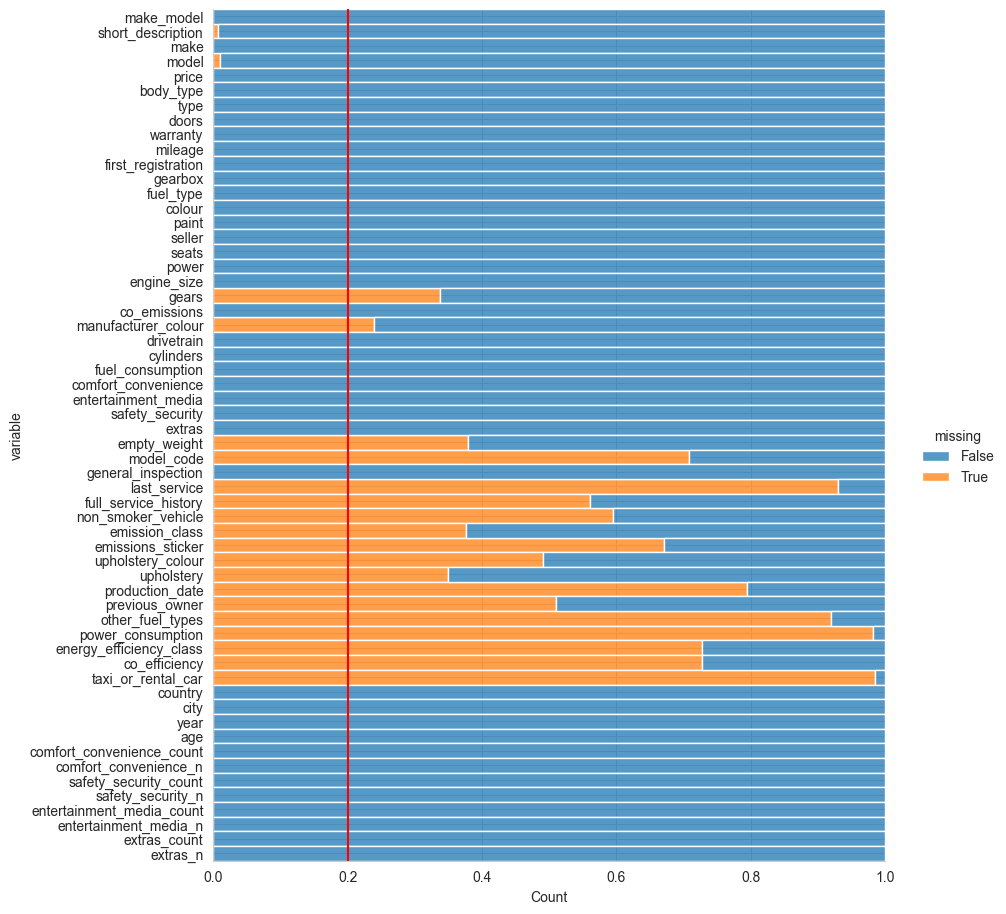

In [981]:
show_nulls(df1);

# Last Service

In [982]:
df1['last_service'].value_counts(dropna=False)

last_service
NaN        26627
09/2022      220
08/2022      196
06/2022      164
07/2022      155
           ...  
02/2018        1
02/2011        1
10/2013        1
08/2017        1
08/2019        1
Name: count, Length: 62, dtype: int64

In [983]:
df1['last_service'] = df1['last_service'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )
df1['last_service'].value_counts(dropna=False)

last_service
No     26627
Yes     2003
Name: count, dtype: int64

In [984]:
df1['last_service']=df1['last_service'].astype('str')

In [985]:
df1['last_service'] = df1['last_service'].apply(lambda x : 0 if x== 'No' else 1 if x=='Yes' else 2 )
df1['last_service'].value_counts(dropna=False)

last_service
0    26627
1     2003
Name: count, dtype: int64

In [986]:
df1['full_service_history'].value_counts(dropna=False)

full_service_history
NaN    16065
Yes    12565
Name: count, dtype: int64

In [987]:
df1['full_service_history'] = df1['full_service_history'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )
df1['full_service_history'].value_counts(dropna=False)

full_service_history
No     16065
Yes    12565
Name: count, dtype: int64

In [988]:
df1['full_service_history']=df1['full_service_history'].astype('str')

In [989]:
df1['full_service_history']=df1['full_service_history'].apply(lambda x : 0 if x== 'No' else 1 if x=='Yes' else 2 )
df1['full_service_history'].value_counts(dropna=False)

full_service_history
0    16065
1    12565
Name: count, dtype: int64

# No Smoker Vehicle

In [990]:
df1['non_smoker_vehicle'].value_counts(dropna=False)

non_smoker_vehicle
NaN    17036
Yes    11594
Name: count, dtype: int64

In [991]:
df1['non_smoker_vehicle'] = df1['non_smoker_vehicle'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )
df1['non_smoker_vehicle'].value_counts(dropna=False)

non_smoker_vehicle
No     17036
Yes    11594
Name: count, dtype: int64

In [992]:
df1['non_smoker_vehicle']=df1['non_smoker_vehicle'].astype('str')

In [993]:
df1['non_smoker_vehicle']=df1['non_smoker_vehicle'].apply(lambda x : 0 if x== 'No' else 1 if x=='Yes' else 2 )
df1['non_smoker_vehicle'].value_counts(dropna=False)

non_smoker_vehicle
0    17036
1    11594
Name: count, dtype: int64

# Emission Class

In [994]:
df1['emission_class'].value_counts(dropna=False)

emission_class
Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: count, dtype: int64

In [995]:
df1.loc[df1['emission_class'].isna()]['emissions_sticker'].value_counts(dropna=False)

emissions_sticker
NaN               10288
4 (Green)           427
1 (No sticker)       56
Name: count, dtype: int64

In [996]:
df1['emission_class']=df1.groupby(['fuel_type','engine_size','co_emissions','emissions_sticker'])['emission_class'].fillna(method='bfill').fillna(method='ffill')

In [997]:
df1['emission_class'].value_counts(dropna=False)

emission_class
Euro 6    23691
Euro 5     2719
Euro 4     1738
Euro 3      293
Euro 2      123
Euro 1       61
NaN           5
Name: count, dtype: int64

In [998]:
df1['emission_class']=df1.groupby(['fuel_type','engine_size','co_emissions'])['emission_class'].fillna(method='bfill').fillna(method='ffill')

In [999]:
df1['emission_class'].isna().sum()

0

In [1000]:
df1['emission_class']=df1['emission_class'].str.split(' ').str[1]

In [1001]:
df1['emission_class'].value_counts(dropna=False)

emission_class
6    23696
5     2719
4     1738
3      293
2      123
1       61
Name: count, dtype: int64

 # Upholstery

In [1002]:
df1['upholstery'].value_counts(dropna=False)

upholstery
NaN             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: count, dtype: int64

In [1003]:
df1['upholstery'] = df1['upholstery'].apply(lambda x: 'Cloth' if x in ['Cloth', 'Velour'] or pd.isna(x) 
                                              else 'Leather' if x in ['Full leather', 'Part leather'] 
                                              else 'Other' if x in ['Other', 'alcantara']
                                              else 'Unknown')

In [1004]:
df1['upholstery'].value_counts(dropna=False)

upholstery
Cloth      18964
Leather     8274
Other       1392
Name: count, dtype: int64

In [1005]:
df1['upholstery']=df1['upholstery'].astype('str')

# Previous Owner

In [1006]:
df1['previous_owner'].value_counts(dropna=False)

previous_owner
NaN      14615
1.00      9746
2.00      3221
3.00       699
4.00       184
5.00        69
6.00        37
7.00        22
8.00        16
9.00        14
12.00        3
10.00        2
14.00        1
13.00        1
Name: count, dtype: int64

In [1007]:
df1['previous_owner']=df1['previous_owner'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )

In [1008]:
df1['previous_owner'].value_counts(dropna=False)

previous_owner
No     14615
Yes    14015
Name: count, dtype: int64

In [1009]:
df1['previous_owner']=df1['previous_owner'].astype('str')

In [1010]:
df1['previous_owner']=df1['previous_owner'].apply(lambda x : 0 if x== 'No' else 1 if x=='Yes' else 2 )
df1['previous_owner'].value_counts(dropna=False)

previous_owner
0    14615
1    14015
Name: count, dtype: int64

In [1011]:
df1['power_consumption'].value_counts(dropna=False)  # to be dropped

power_consumption
NaN      28115
0.00       101
15.20       30
15.70       19
17.70       17
         ...  
18.00        1
25.30        1
12.70        1
22.70        1
20.40        1
Name: count, Length: 105, dtype: int64

In [1012]:
df1['co_efficiency'].value_counts(dropna=False) # to be dropped

co_efficiency
NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: count, dtype: int64

In [1013]:
df1['taxi_or_rental_car'].value_counts(dropna=False)

taxi_or_rental_car
NaN    28208
Yes      422
Name: count, dtype: int64

In [1014]:
df1['taxi_or_rental_car']=df1['taxi_or_rental_car'].apply(lambda x : 'No' if pd.isnull(x) else 'Yes' )

In [1015]:
df1['taxi_or_rental_car'].value_counts(dropna=False)

taxi_or_rental_car
No     28208
Yes      422
Name: count, dtype: int64

In [1016]:
df1['taxi_or_rental_car']=df1['taxi_or_rental_car'].astype('str')

In [1017]:
df1['taxi_or_rental_car']=df1['taxi_or_rental_car'].apply(lambda x : 0 if x== 'No' else 1 if x=='Yes' else 2 )

In [1018]:
df1['taxi_or_rental_car'].value_counts(dropna=False)

taxi_or_rental_car
0    28208
1      422
Name: count, dtype: int64

# Paint

In [1019]:
df1['paint'].value_counts(dropna=False)

paint
1    14494
0    14136
Name: count, dtype: int64

In [1020]:
df1["paint"] = df1["paint"].apply(lambda x: 'Metallic'  if x == 1 else 'Basic')

In [1021]:
df1["paint"]=df1["paint"].astype('str')

In [1022]:
df1['paint'].value_counts(dropna=False)

paint
Metallic    14494
Basic       14136
Name: count, dtype: int64

# Dropping

In [1024]:
df1.columns

Index(['make_model', 'short_description', 'make', 'model', 'price',
       'body_type', 'type', 'doors', 'warranty', 'mileage',
       'first_registration', 'gearbox', 'fuel_type', 'colour', 'paint',
       'seller', 'seats', 'power', 'engine_size', 'gears', 'co_emissions',
       'manufacturer_colour', 'drivetrain', 'cylinders', 'fuel_consumption',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'empty_weight', 'model_code', 'general_inspection',
       'last_service', 'full_service_history', 'non_smoker_vehicle',
       'emission_class', 'emissions_sticker', 'upholstery_colour',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'taxi_or_rental_car', 'country', 'city', 'year', 'age',
       'comfort_convenience_count', 'comfort_convenience_n',
       'safety_security_count', 'safety_security_n',
       'entertainment_media_count', 'enterta

In [1025]:
df1.shape

(28630, 58)

In [1026]:
df1.drop(['short_description', 'model', 'gears', 'manufacturer_colour','cylinders', 'empty_weight', 'model_code',
          'emissions_sticker', 'upholstery_colour','production_date', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency', 'year',  'comfort_convenience_count', 'safety_security_count',
       'entertainment_media_count', 'extras_count', 'city'], axis=1, inplace=True)

In [1027]:
df1.shape

(28630, 38)

In [1028]:
df1.columns

Index(['make_model', 'make', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'seller', 'seats', 'power', 'engine_size', 'co_emissions',
       'drivetrain', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'upholstery', 'previous_owner',
       'taxi_or_rental_car', 'country', 'age', 'comfort_convenience_n',
       'safety_security_n', 'entertainment_media_n', 'extras_n'],
      dtype='object')

In [1029]:
df1.to_csv('df1_no_missing_val.csv')